# Import necessary libraries

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset

In [ ]:
df = pd.read_csv("/content/tested.csv")


# 🔍 Display initial data overview

In [ ]:
print("Dataset Overview:\n", df.head())

Dataset Overview:
    PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


# 🔍 Check missing values

In [ ]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
print("Mode of Embarked column:", df["Embarked"].mode())
print(df["Embarked"].unique())


Mode of Embarked column: 0    S
Name: Embarked, dtype: object
['Q' 'S' 'C']


In [ ]:

print(df["Embarked"].unique())  # Should only show [2] if all were 'S'



['Q' 'S' 'C']


In [ ]:
print(df["Sex"].unique())
print(df["Sex"].isnull().sum())  # Count missing values


['male' 'female']
0


In [ ]:
df["Sex"] = df["Sex"].fillna("male")  # Assuming most passengers were male


# 🔹 Fill missing values

In [ ]:
df["Age"] = df["Age"].fillna(df["Age"].median())  # Fill Age with median
df["Fare"] = df["Fare"].fillna(df["Fare"].median())  # Fill Fare with median
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])  # Fill Embarked with mode
df["Sex"] = df["Sex"].fillna(df["Sex"].mode()[0])  # Fill Sex with mode



# 🔹 Drop irrelevant columns

In [ ]:
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

# 🔹 Encode categorical features

In [ ]:
sex_mapping = {"male": 0, "female": 1}
embarked_mapping = {"C": 0, "Q": 1, "S": 2}

df["Sex"] = df["Sex"].map(sex_mapping)
df["Embarked"] = df["Embarked"].map(embarked_mapping)



# 🔍 Data after preprocessing

In [ ]:
print("\nData After Preprocessing:\n", df.head())


Data After Preprocessing:
    Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  34.5      0      0   7.8292         1
1         1       3    1  47.0      1      0   7.0000         2
2         0       2    0  62.0      0      0   9.6875         1
3         0       3    0  27.0      0      0   8.6625         2
4         1       3    1  22.0      1      1  12.2875         2


# 📊 Exploratory Data Analysis (EDA)

#Survival Count 📊

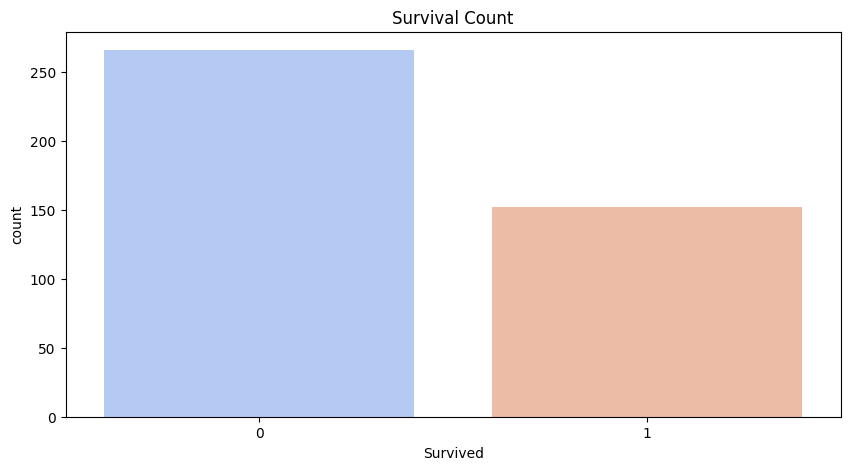

In [ ]:

plt.figure(figsize=(10, 5))
sns.countplot(x="Survived", data=df, hue="Survived", palette="coolwarm", legend=False)
plt.title("Survival Count")
plt.show()

#Age Distribution📊

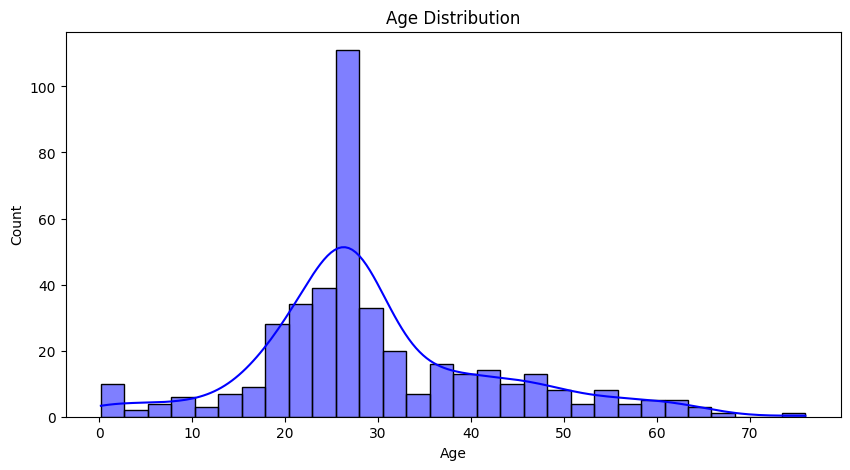

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df["Age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.show()


#Fare Paid vs Survival 📊

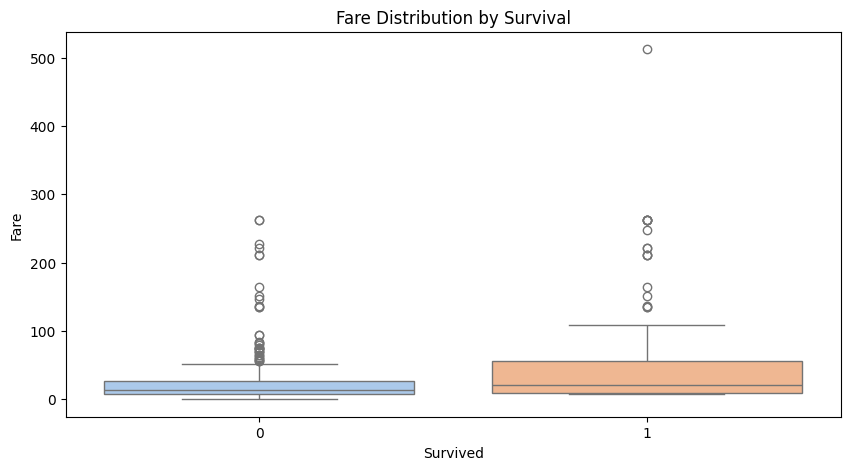

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Survived", y="Fare", data=df, hue="Survived", palette="pastel", legend=False)
plt.title("Fare Distribution by Survival")
plt.show()

# 🔍 Survival rate by class

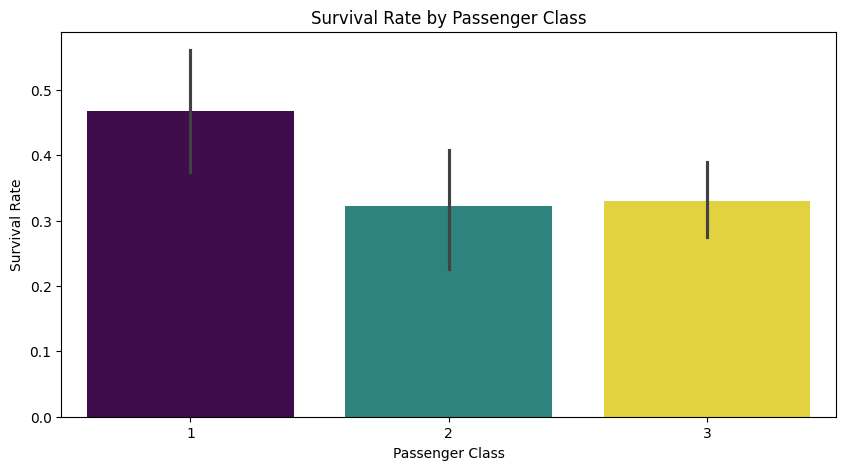

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Pclass", y="Survived", data=df, hue="Pclass", palette="viridis", legend=False)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

# 📌 Splitting the data

In [ ]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 📌 Model Training

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

#📌 Model Evaluation

In [ ]:

y_pred = model.predict(X_test)
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


Confusion Matrix:
 [[50  0]
 [ 0 34]]


# 🔮 Prediction Function


In [ ]:

def predict_survival(Pclass, Sex, Age, SibSp, Parch, Fare, Embarked):
    """Predicts survival of a Titanic passenger based on input details."""
    Sex = sex_mapping.get(Sex.lower(), -1)
    Embarked = embarked_mapping.get(Embarked.upper(), -1)

    if Sex == -1 or Embarked == -1:
        return "⚠ Invalid input! Use 'male'/'female' for Sex and 'C'/'Q'/'S' for Embarked."

    input_data = pd.DataFrame([[Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]],
                              columns=X.columns)  # Ensure correct feature names

    input_data_scaled = scaler.transform(input_data)
    prediction = model.predict(input_data_scaled)

    return "✅ Survived" if prediction[0] == 1 else "❌ Did Not Survive"

#Prediction

In [ ]:
print(predict_survival(3, "male", 22, 1, 0, 7.25, "S"))


❌ Did Not Survive


In [ ]:
predict_survival(1, "female", 30, 1, 1, 50, "C")


'✅ Survived'